In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Parte 1: Preparación del entorno
#!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
# Parte 2: Carga y análisis exploratorio de los datos
file_path = "/content/drive/MyDrive/UEESML/test.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

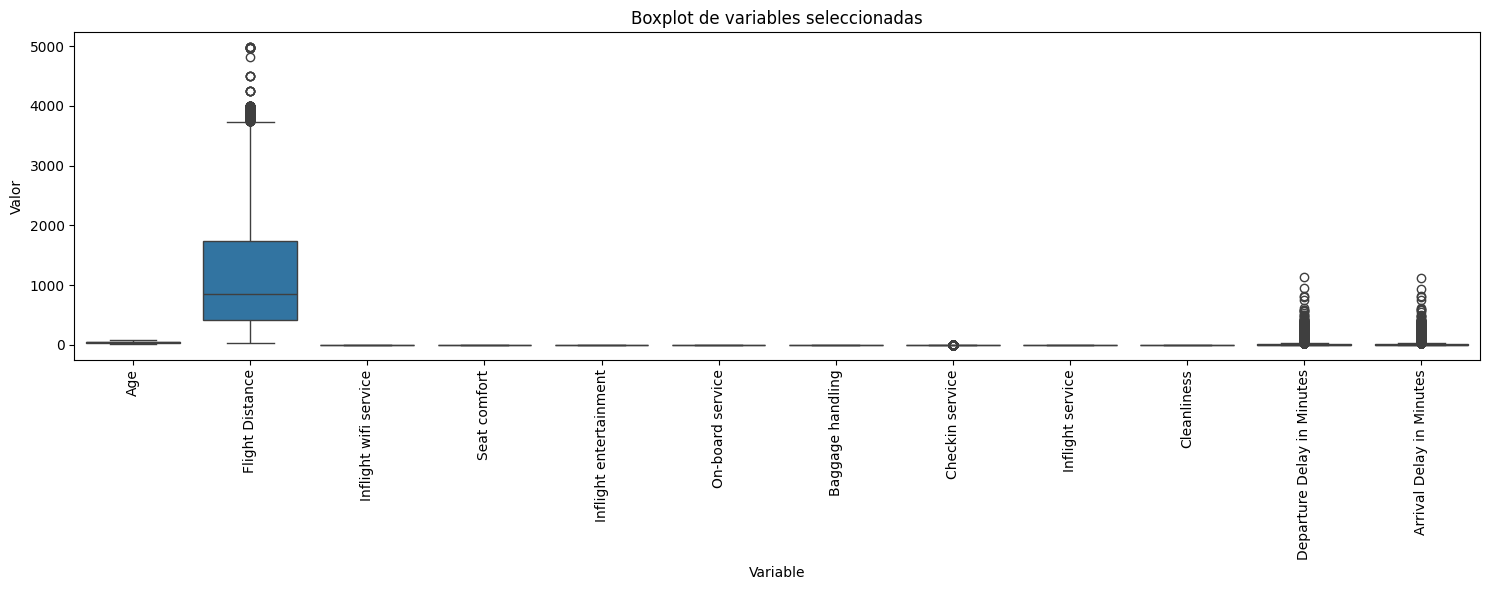

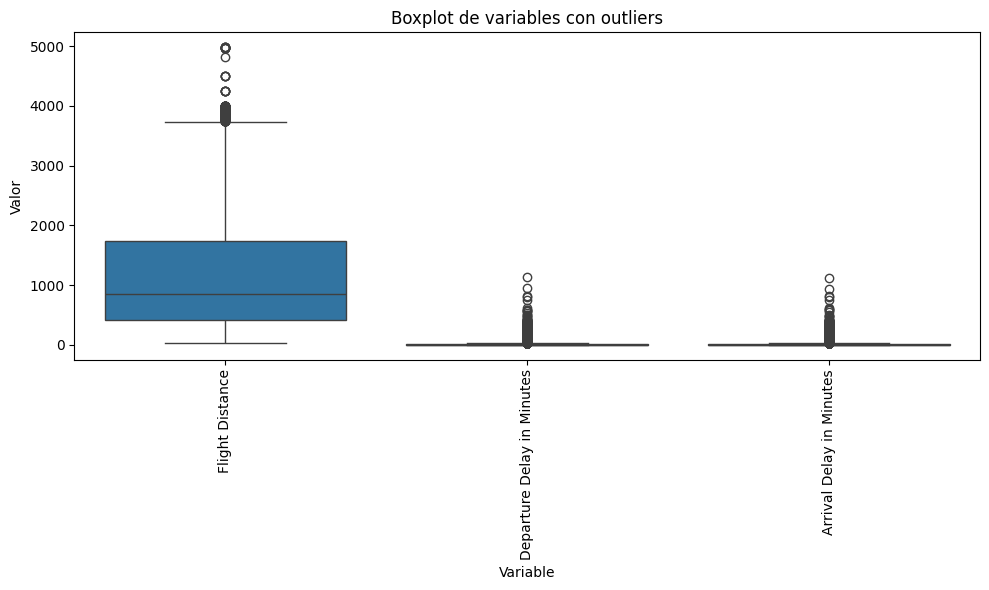

In [5]:
# Lista de variables a graficar
variables_boxplot = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Subset del DataFrame con solo esas columnas
df_subset = df[variables_boxplot]

# Derretir los datos para boxplot
data_melted = df_subset.melt(var_name='Variable', value_name='Valor')

# Graficar
plt.figure(figsize=(15, 6))
sns.boxplot(x='Variable', y='Valor', data=data_melted)
plt.title("Boxplot de variables seleccionadas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Variables adicionales (4)
variables_3 = [
    'Flight Distance',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Subset y derretido
df_3 = df[variables_3]
data_3 = df_3.melt(var_name='Variable', value_name='Valor')

# Gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Valor', data=data_3)
plt.title("Boxplot de variables con outliers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

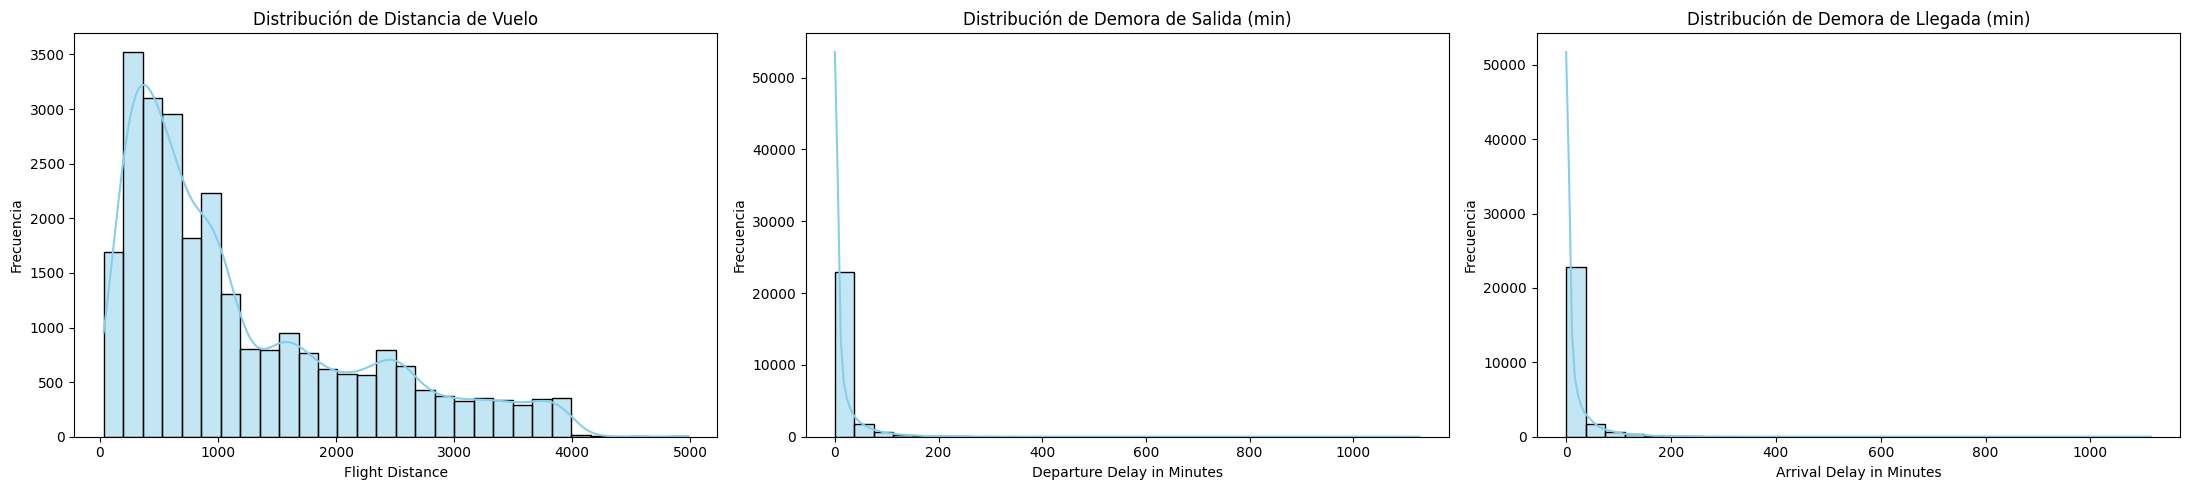

In [6]:
# Crear una figura con 4 subplots (uno para cada variable)
fig, axes = plt.subplots(1, 3, figsize=(22, 5))

# Lista de variables y títulos personalizados
variables = ['Flight Distance',
             'Departure Delay in Minutes', 'Arrival Delay in Minutes']
titulos = ['Distancia de Vuelo',
           'Demora de Salida (min)', 'Demora de Llegada (min)']

# Graficar cada variable como histograma con curva de densidad
for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {titulos[i]}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Filas originales: 25976
Filas luego de eliminar outliers: 18822


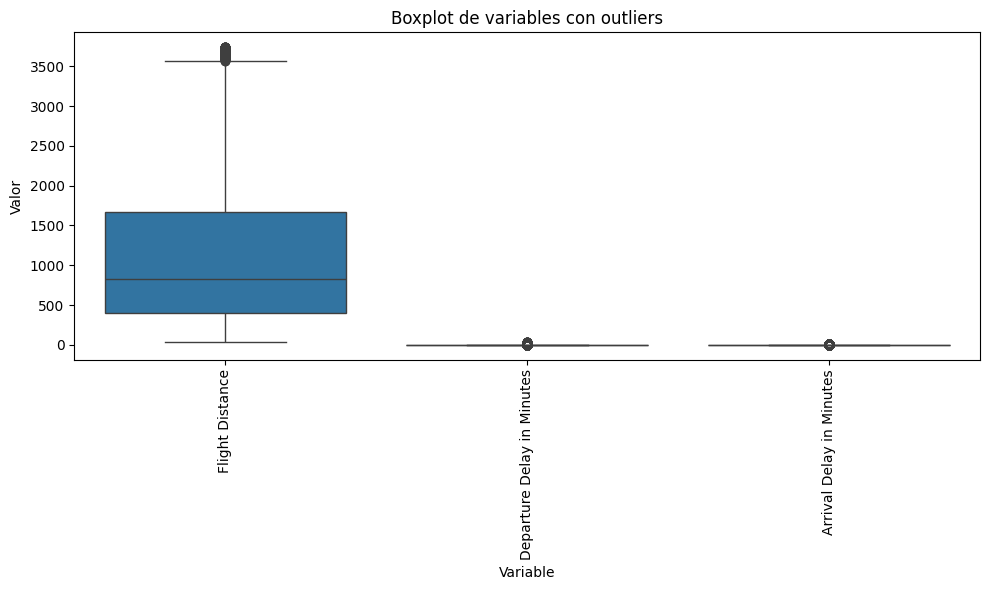

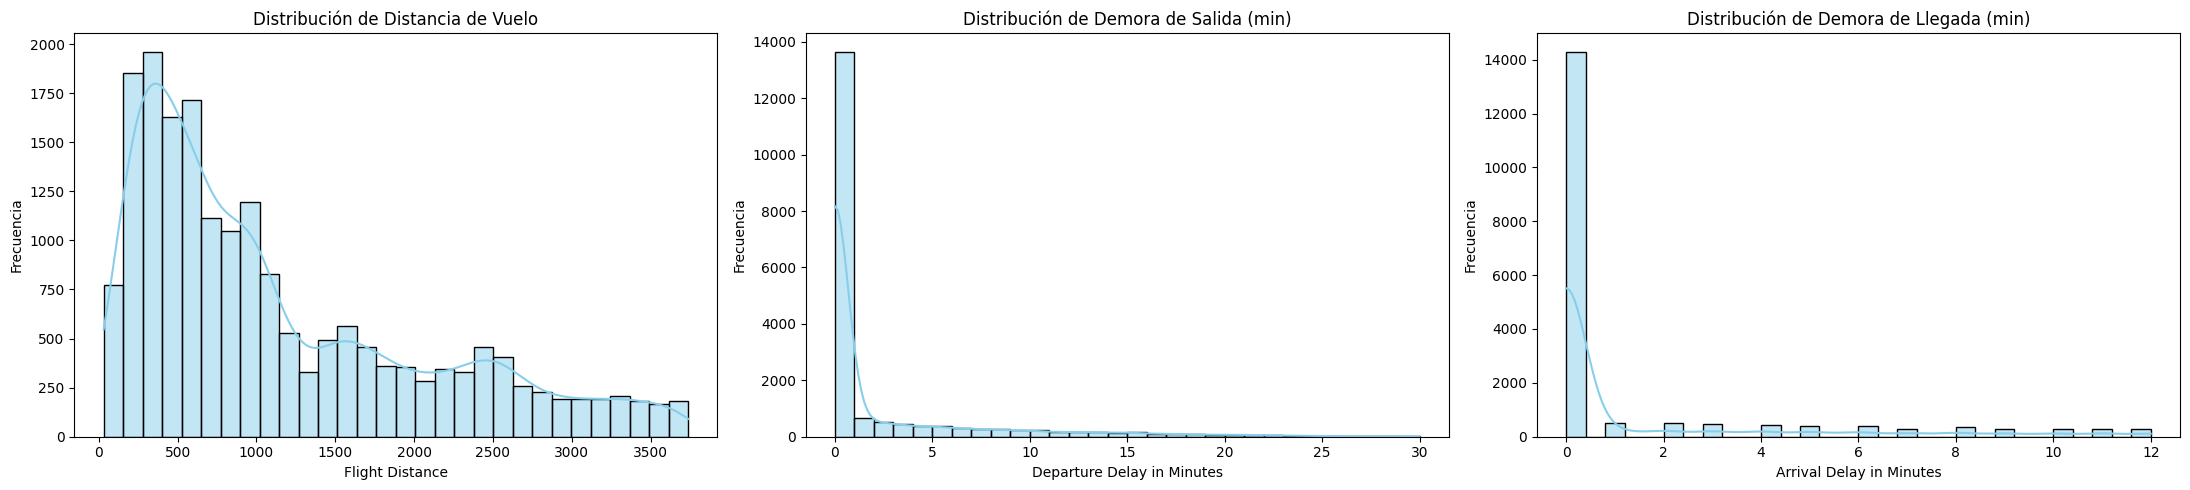

In [7]:
# Variables objetivo
variables_outliers = ['Flight Distance',
                      'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Copia del DataFrame para no modificar el original
df_limpio = df.copy()

# Aplicar eliminación de outliers para cada variable
for var in variables_outliers:
    Q1 = df_limpio[var].quantile(0.25)
    Q3 = df_limpio[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores dentro del rango aceptado
    df_limpio = df_limpio[(df_limpio[var] >= lower_bound) & (df_limpio[var] <= upper_bound)]

# Resultado
print(f"Filas originales: {len(df)}")
print(f"Filas luego de eliminar outliers: {len(df_limpio)}")

#BOXPLOT
# Variables con outliers (4)
variables_3 = [
    'Flight Distance',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Subset y derretido
df_3 = df_limpio[variables_3]
data_3 = df_3.melt(var_name='Variable', value_name='Valor')

# Gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Valor', data=data_3)
plt.title("Boxplot de variables con outliers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#HISTOGRAMA Y DENSIDAD
# Crear una figura con 3 subplots (uno para cada variable)
fig, axes = plt.subplots(1, 3, figsize=(22, 5))

# Lista de variables y títulos personalizados
variables = ['Flight Distance',
             'Departure Delay in Minutes', 'Arrival Delay in Minutes']
titulos = ['Distancia de Vuelo',
           'Demora de Salida (min)', 'Demora de Llegada (min)']

# Graficar cada variable como histograma con curva de densidad
for i, var in enumerate(variables):
    sns.histplot(df_limpio[var], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {titulos[i]}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Filas originales: 18822
Filas luego de eliminar outliers: 12322


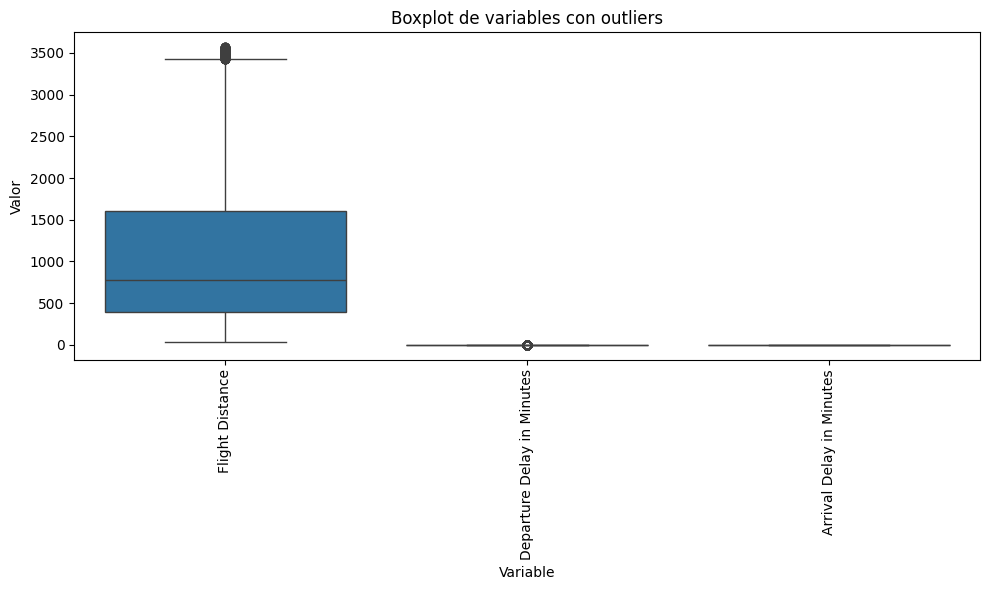

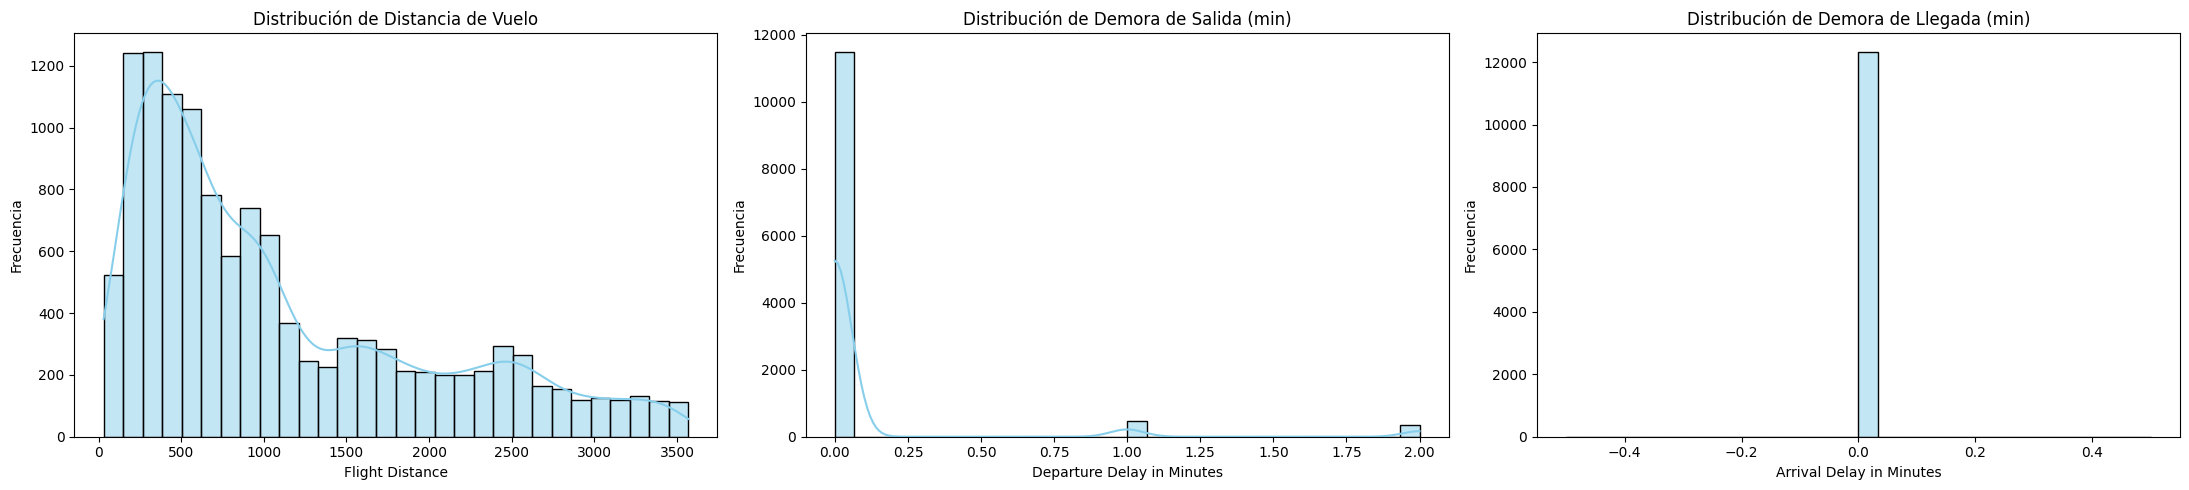

In [8]:
# Variables objetivo
variables_outliers = ['Flight Distance',
                      'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Copia del DataFrame para no modificar el original
df_limpio1 = df_limpio.copy()

# Aplicar eliminación de outliers para cada variable
for var in variables_outliers:
    Q1 = df_limpio1[var].quantile(0.25)
    Q3 = df_limpio1[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores dentro del rango aceptado
    df_limpio1 = df_limpio1[(df_limpio1[var] >= lower_bound) & (df_limpio1[var] <= upper_bound)]

# Resultado
print(f"Filas originales: {len(df_limpio)}")
print(f"Filas luego de eliminar outliers: {len(df_limpio1)}")

#BOXPLOT
# Variables con outliers (4)
variables_3 = [
    'Flight Distance',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Subset y derretido
df_3 = df_limpio1[variables_3]
data_3 = df_3.melt(var_name='Variable', value_name='Valor')

# Gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Valor', data=data_3)
plt.title("Boxplot de variables con outliers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#HISTOGRAMA Y DENSIDAD
# Crear una figura con 3 subplots (uno para cada variable)
fig, axes = plt.subplots(1, 3, figsize=(22, 5))

# Lista de variables y títulos personalizados
variables = ['Flight Distance',
             'Departure Delay in Minutes', 'Arrival Delay in Minutes']
titulos = ['Distancia de Vuelo',
           'Demora de Salida (min)', 'Demora de Llegada (min)']

# Graficar cada variable como histograma con curva de densidad
for i, var in enumerate(variables):
    sns.histplot(df_limpio1[var], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {titulos[i]}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [10]:
#estadisticas descriptivas
# Seleccionar las variables de interés
variables = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_desc = df_limpio1[variables]

# Calcular estadísticas descriptivas básicas
desc_stats = df_desc.describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
Age,12322.0,39.503977,15.286157,7.0,27.0,40.0,51.00,85.0
Flight Distance,12322.0,1089.823649,891.693574,31.0,391.0,780.0,1603.75,3568.0
Departure Delay in Minutes,12322.0,0.097143,0.382509,0.0,0.0,0.0,0.00,2.0
Arrival Delay in Minutes,12322.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


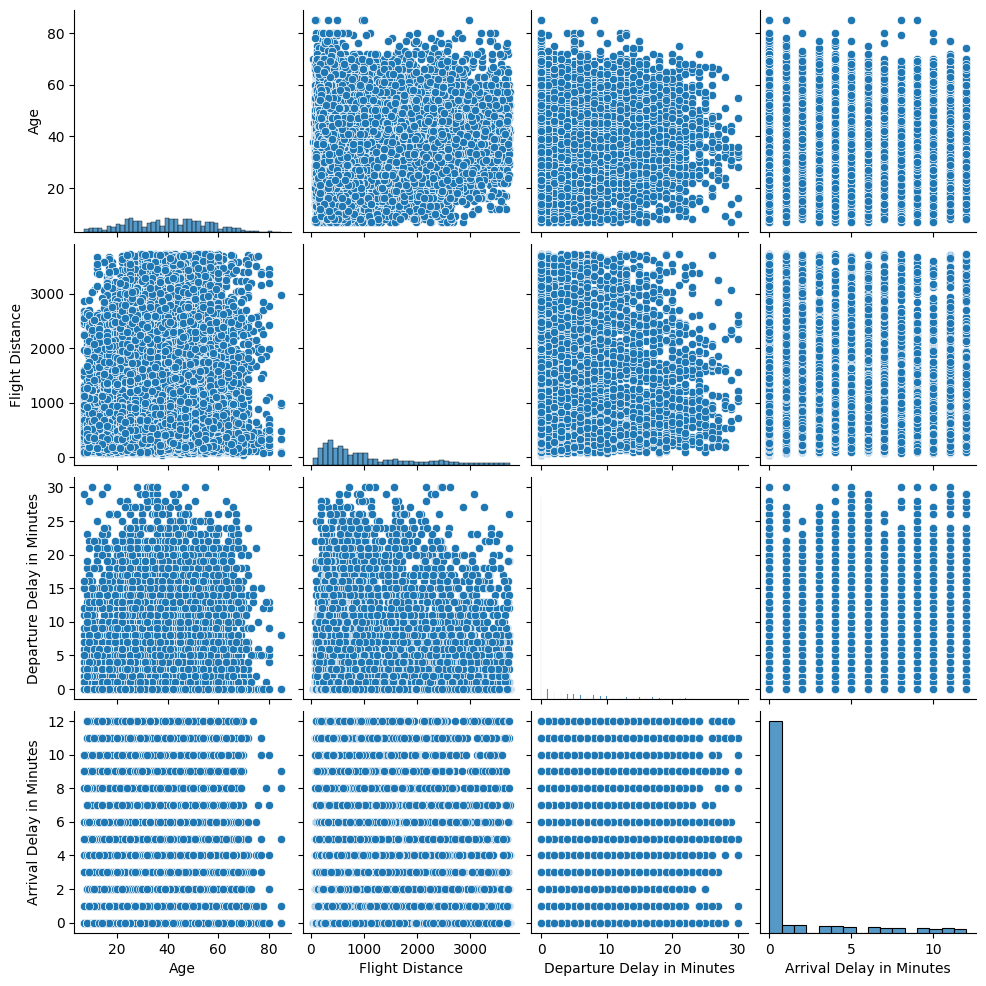

In [11]:
# Visualización de la distribución
sns.pairplot(df_limpio [['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']])
plt.show()

In [12]:
# Revisar valores nulos en X y y
print("\nValores nulos en X (features):")
print(df_limpio.isnull().sum())


Valores nulos en X (features):
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                    

In [13]:
df.dropna(axis=0, inplace= True)

In [14]:
# Parte 3: Preprocesamiento
X = df_limpio1[['Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Mostrar los nombres de columnas con su índice (posición)
for i, col in enumerate(X.columns):
    print(f"{i}: {col}")

0: Age
1: Flight Distance
2: Departure Delay in Minutes
3: Arrival Delay in Minutes


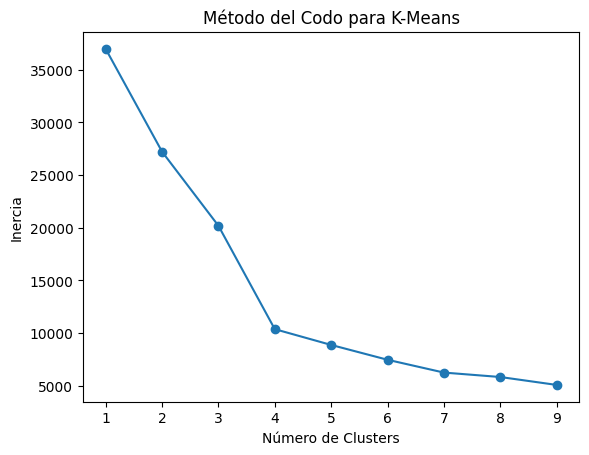

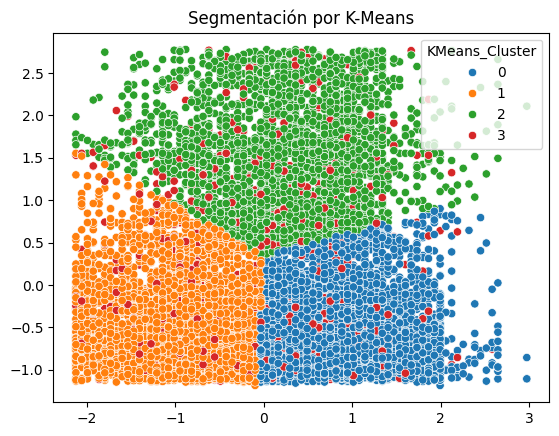

In [15]:
# Parte 4.1: Clustering con K-Means
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Método del Codo
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters') # Numero de grupos
plt.ylabel('Inercia') # la suma de las distancias cuadradas de cada punto a su centroide (cuánto error hay dentro de cada cluster).
plt.title('Método del Codo para K-Means')
plt.show()
# Ajuste del modelo con K óptimo (4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_limpio1['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_limpio1['KMeans_Cluster'], palette='tab10')
plt.title('Segmentación por K-Means')
plt.show()

In [16]:
# Parte 4.1.1: Interpretación de Clustering con K-Means
df_limpio1.groupby('KMeans_Cluster')[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
KMeans_Cluster,,,,
0,52.389511,608.680334,0.000000,0.0
1,25.329825,693.356360,0.000000,0.0
2,43.555393,2460.853382,0.001463,0.0
3,38.901442,1181.795673,1.433894,0.0


In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df_limpio1['KMeans_Cluster'])
print(f"Silhouette Score con k=4: {score:.4f}")

Silhouette Score con k=4: 0.4431


In [96]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Parámetros a comparar
eps_list = [0.05, 0.25, 0.5, 0.75, 1]
min_samples_list = [1, 5, 10, 15, 20]

# Guardar resultados
resultados = []

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        etiquetas = dbscan.fit_predict(X_scaled)

        n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
        n_ruido = list(etiquetas).count(-1)
        total = len(etiquetas)
        porcentaje_ruido = n_ruido / total * 100

        resultados.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'puntos_ruido': n_ruido,
            'porcentaje_ruido': round(porcentaje_ruido, 2)
        })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados).sort_values(by=['eps', 'min_samples']).reset_index(drop=True)
# Mostrar los primeros resultados directamente en consola
print(df_resultados.head(25))

     eps  min_samples  n_clusters  puntos_ruido  porcentaje_ruido
0   0.05            1        1998             0              0.00
1   0.05            5         391          2907             23.59
2   0.05           10         189          5722             46.44
3   0.05           15         107          7954             64.55
4   0.05           20          57          9877             80.16
5   0.25            1          58             0              0.00
6   0.25            5          15           127              1.03
7   0.25           10           8           358              2.91
8   0.25           15           9           551              4.47
9   0.25           20           4           712              5.78
10  0.50            1           7             0              0.00
11  0.50            5           3             8              0.06
12  0.50           10           3            23              0.19
13  0.50           15           3            66              0.54
14  0.50  

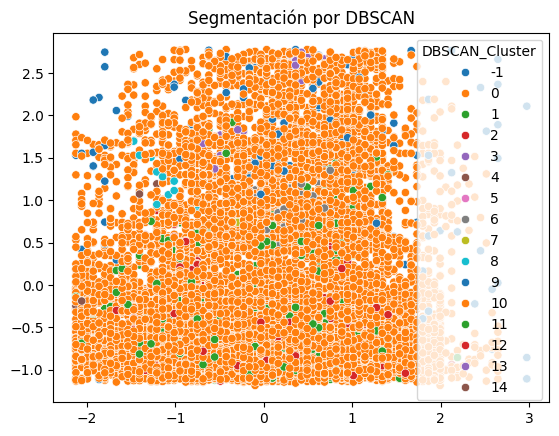

In [18]:
# Parte 4.2: Clustering con DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=5) # eps = radio máximo para considerar que dos puntos están “cerca”./ min_samples =  número mínimo de puntos vecinos necesarios para formar un cluster.
df_limpio1['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_limpio1['DBSCAN_Cluster'], palette='tab10')
plt.title('Segmentación por DBSCAN')
plt.show()

In [19]:
# Parte 4.2.1: Interpretando los Clustering con DBSCAN
df_limpio1['DBSCAN_Cluster'].value_counts()
df_limpio1.groupby('DBSCAN_Cluster')[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
DBSCAN_Cluster,,,,
-1,46.031496,2266.409449,1.314961,0.0
0,39.501526,1080.415366,0.000000,0.0
1,39.005208,855.958333,1.000000,0.0
2,38.753363,685.793722,2.000000,0.0
3,34.000000,2599.700000,2.000000,0.0
4,8.333333,850.666667,2.000000,0.0
5,59.666667,2201.833333,2.000000,0.0
6,45.111111,1972.370370,2.000000,0.0
7,34.250000,1860.750000,2.000000,0.0


In [20]:
# Parte 4.2.1: Interpretando los Clustering con DBSCAN sin atípicos
df_no_noise = df_limpio1[df_limpio1['DBSCAN_Cluster'] != -1]
df_no_noise.groupby('DBSCAN_Cluster')[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
DBSCAN_Cluster,,,,
0,39.501526,1080.415366,0.0,0.0
1,39.005208,855.958333,1.0,0.0
2,38.753363,685.793722,2.0,0.0
3,34.000000,2599.700000,2.0,0.0
4,8.333333,850.666667,2.0,0.0
5,59.666667,2201.833333,2.0,0.0
6,45.111111,1972.370370,2.0,0.0
7,34.250000,1860.750000,2.0,0.0
8,21.785714,2206.714286,2.0,0.0


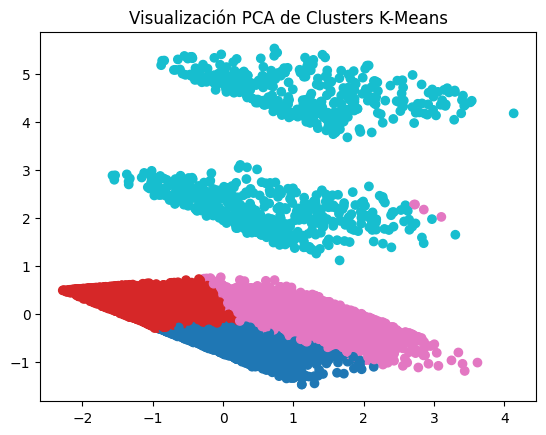

In [21]:
# Parte 5.1: Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_limpio1['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización PCA de Clusters K-Means')
plt.show()

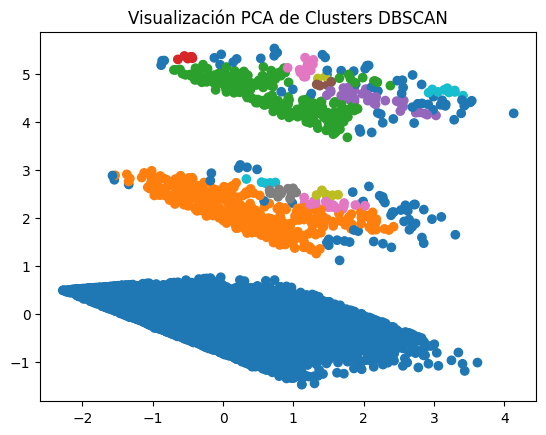

In [22]:
# Parte 5.1: Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_limpio1['DBSCAN_Cluster'], cmap='tab10')
plt.title('Visualización PCA de Clusters DBSCAN')
plt.show()

t-SNE con perplexity=10, learning_rate=100


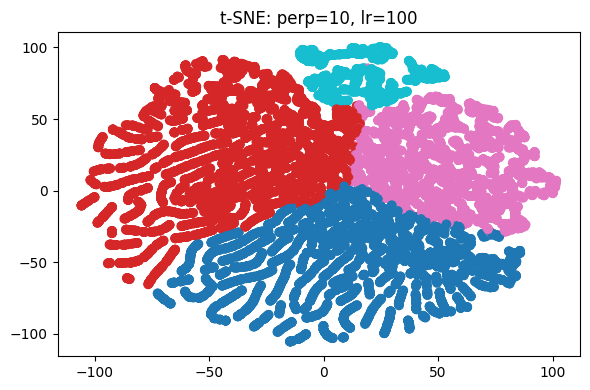

t-SNE con perplexity=10, learning_rate=200


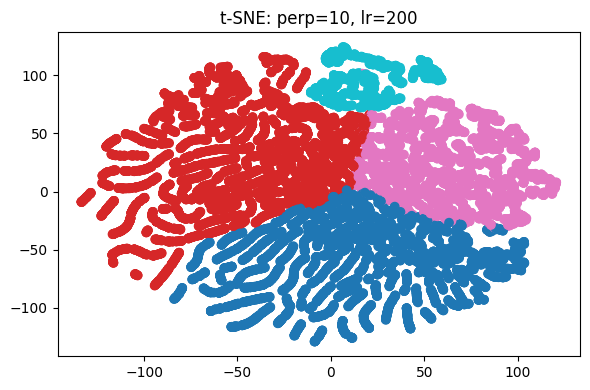

t-SNE con perplexity=10, learning_rate=500


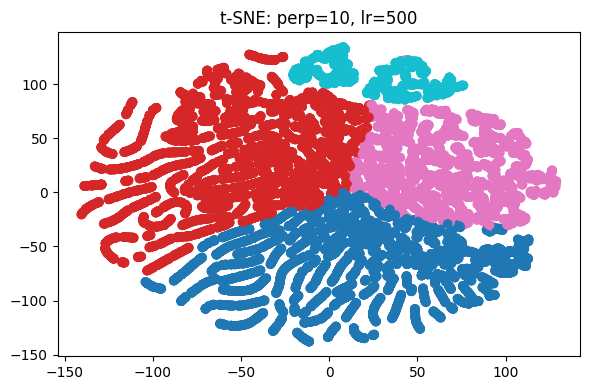

t-SNE con perplexity=30, learning_rate=100


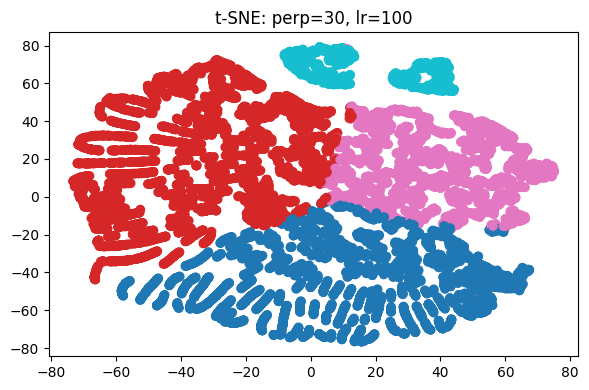

t-SNE con perplexity=30, learning_rate=200


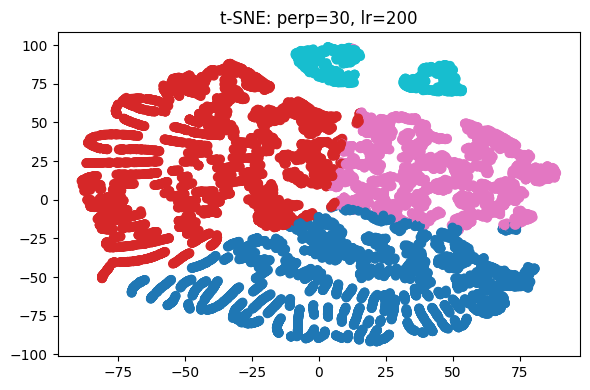

t-SNE con perplexity=30, learning_rate=500


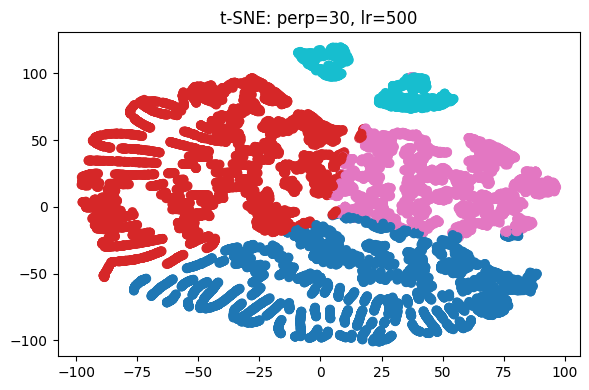

t-SNE con perplexity=50, learning_rate=100


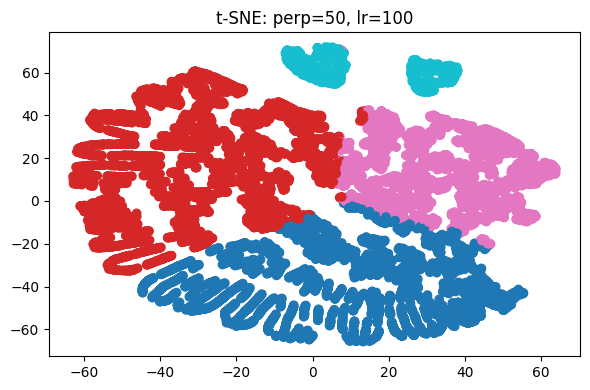

t-SNE con perplexity=50, learning_rate=200


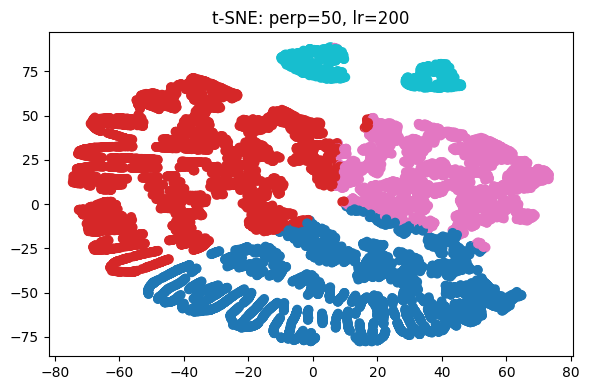

t-SNE con perplexity=50, learning_rate=500


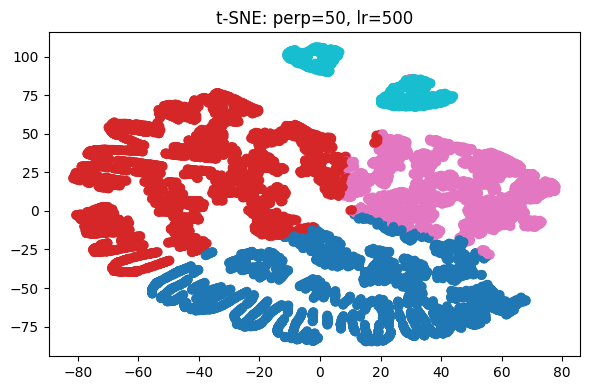

In [108]:
for perp in [10, 30, 50]:
    for lr in [100, 200, 500]:
        print(f"t-SNE con perplexity={perp}, learning_rate={lr}")
        tsne = TSNE(n_components=2, perplexity=perp, learning_rate=lr, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        plt.figure(figsize=(6, 4))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_limpio1['KMeans_Cluster'], cmap='tab10')
        plt.title(f't-SNE: perp={perp}, lr={lr}')
        plt.tight_layout()
        plt.show()


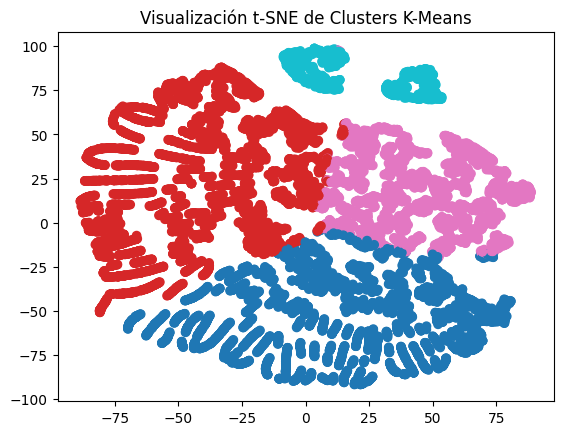

In [24]:
# Parte 5.2: Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42) # cuántos vecinos cercanos considera t-SNE / cuánto se mueven los puntos
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_limpio1['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización t-SNE de Clusters K-Means')
plt.show()

t-SNE con perplexity=10, learning_rate=100


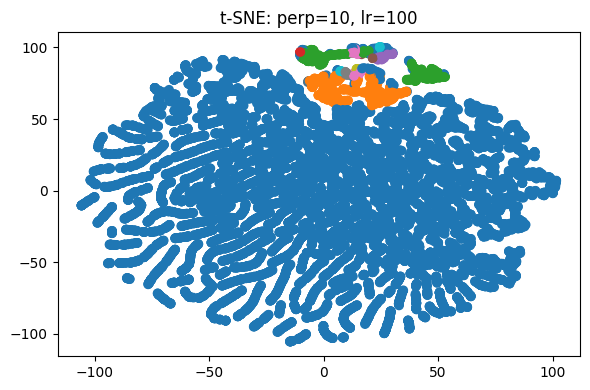

t-SNE con perplexity=10, learning_rate=200


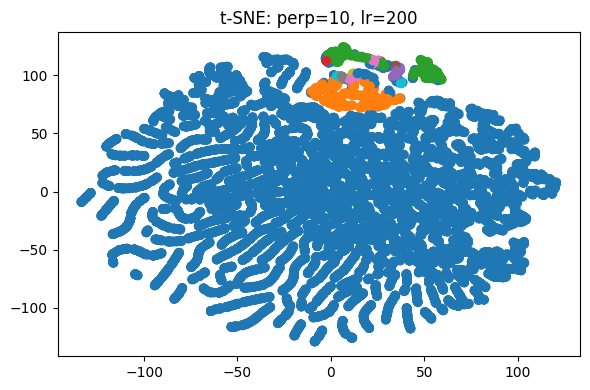

t-SNE con perplexity=10, learning_rate=500


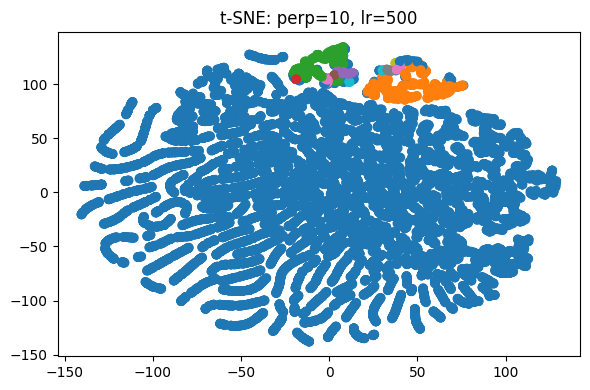

t-SNE con perplexity=30, learning_rate=100


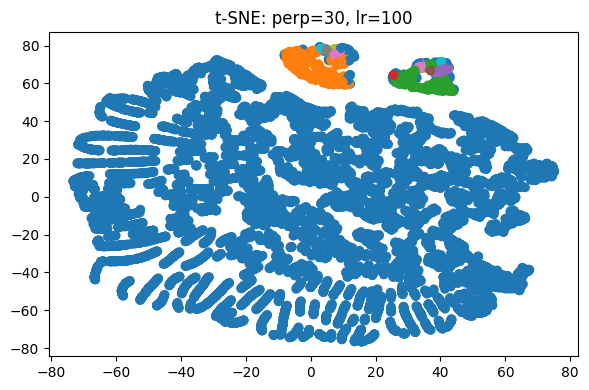

t-SNE con perplexity=30, learning_rate=200


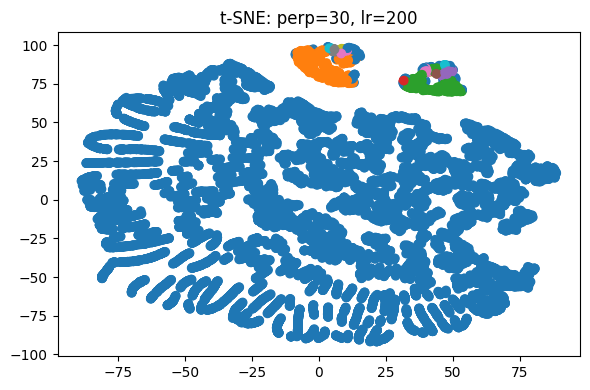

t-SNE con perplexity=30, learning_rate=500


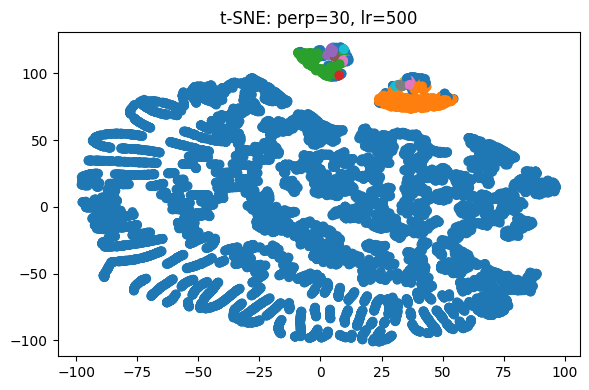

t-SNE con perplexity=50, learning_rate=100


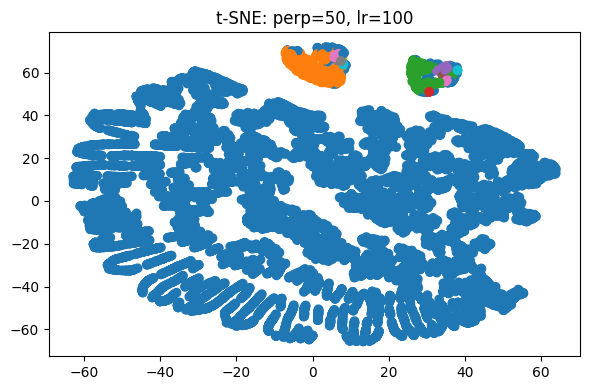

t-SNE con perplexity=50, learning_rate=200


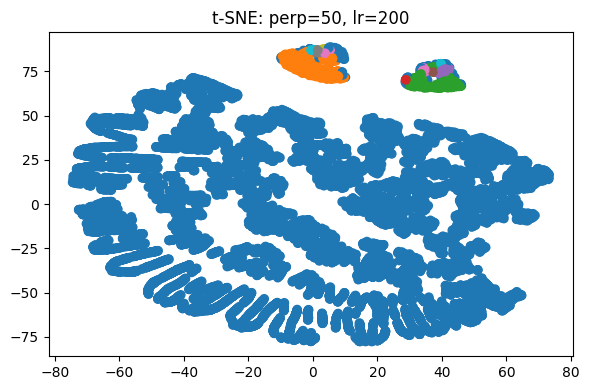

t-SNE con perplexity=50, learning_rate=500


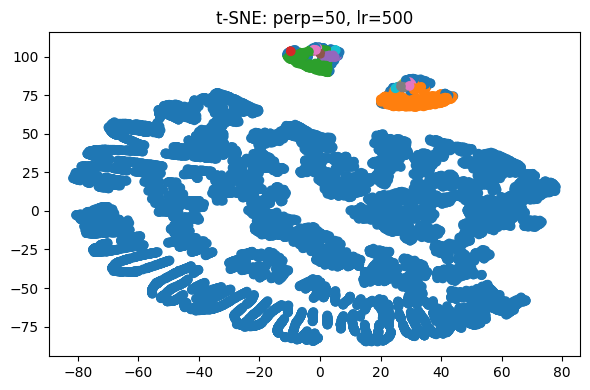

In [109]:
for perp in [10, 30, 50]:
    for lr in [100, 200, 500]:
        print(f"t-SNE con perplexity={perp}, learning_rate={lr}")
        tsne = TSNE(n_components=2, perplexity=perp, learning_rate=lr, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        plt.figure(figsize=(6, 4))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_limpio1['DBSCAN_Cluster'], cmap='tab10')
        plt.title(f't-SNE: perp={perp}, lr={lr}')
        plt.tight_layout()
        plt.show()

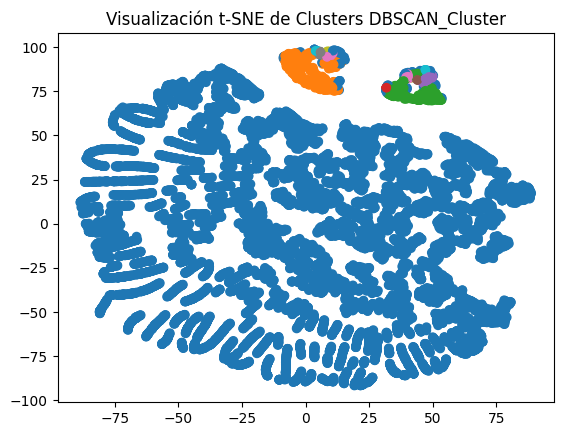

In [25]:
# Parte 5.2: Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42) # cuántos vecinos cercanos considera t-SNE / cuánto se mueven los puntos
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_limpio1['DBSCAN_Cluster'], cmap='tab10')
plt.title('Visualización t-SNE de Clusters DBSCAN_Cluster')
plt.show()

In [110]:
# Parte 6: Análisis
print("Clusters únicos KMeans:", df_limpio1['KMeans_Cluster'].unique())
print("Clusters únicos DBSCAN:", df_limpio1['DBSCAN_Cluster'].unique())

Clusters únicos KMeans: [2 1 3 0]
Clusters únicos DBSCAN: [ 0  1  2  3  4 -1  5  6  8  7  9 10 13 11 14 12]
